1/1 [==============================] - 0s 41ms/step


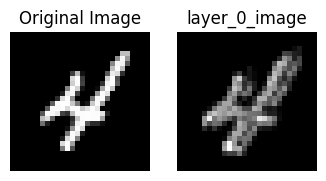

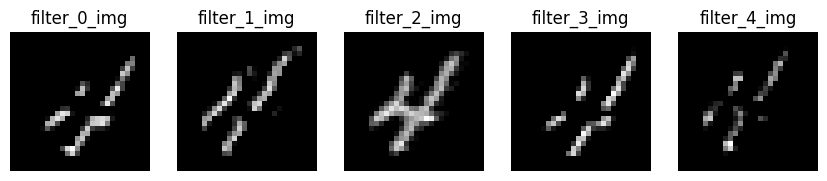

filter_0
 [[ 0.23203447  0.0562315  -0.08606856]
 [ 0.04141212 -0.0044612   0.13019896]
 [-0.20547271 -0.19595823 -0.31837305]]
filter_1
 [[-0.2731707  -0.18253312  0.203091  ]
 [-0.04668188 -0.05764303  0.19887814]
 [ 0.15331474 -0.07977223 -0.02606192]]
filter_2
 [[-0.1171283  -0.0004096   0.18482956]
 [ 0.25948742  0.20971432  0.27177373]
 [-0.24939069  0.01939926 -0.09626016]]
filter_3
 [[ 0.22865036  0.06965247 -0.13434538]
 [ 0.01873478 -0.1581026  -0.24913995]
 [ 0.00696412 -0.19281244 -0.1659774 ]]
filter_4
 [[-0.10450062 -0.1394922   0.04119635]
 [ 0.00839296  0.15013185  0.28358015]
 [-0.28650722 -0.19680779  0.00724253]]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D
from tensorflow.keras.models import Model

# Load and preprocess the data
(train_images, _), (_, _) = mnist.load_data()
train_images = np.expand_dims(train_images, -1).astype('float32') / 255

# Define the input shape
input_img = Input(shape=(28, 28, 1))

# Create a model with multiple convolutional layers
layer_0_output = Conv2D(5, (3, 3), activation='relu', padding='same')(input_img)

# Final model
model = Model(inputs=input_img, outputs=[layer_0_output])

# Select one sample image
sample_image = train_images[9:10]  # Select the 10th image for demonstration

# Get the output of each layer
layer_outputs = model.predict(sample_image)


# Plot the output of convolutional layer
def print_figures(img_ctn, img_names):
  # Taking the mean over the channels of the feature map to visualize it as a 2D image
  for i, (img_matrix, img_name) in enumerate(zip(img_ctn, img_names),start=1):
    plt.subplot(1, len(img_matrix), i)
    plt.imshow(img_matrix, cmap='gray')
    plt.title(img_name)
    plt.axis('off')
  plt.show()

# Function to plot the original image and the output of convolutional layers
plt.figure(figsize=(60, 200))
img_ctn = [sample_image.squeeze(), np.sum(layer_outputs[0], axis=-1)]
img_names = ['Original Image','layer_0_image']
print_figures(img_ctn, img_names)

# Plot image by each filter in convolutional layer
plt.figure(figsize=(60, 200))
img_ctn = [layer_outputs[0][:,:,i] for i in range(5)]
img_names = ['filter_0_img','filter_1_img','filter_2_img','filter_3_img','filter_4_img']
print_figures(img_ctn, img_names)

# Plot weights by each filter
filters = np.squeeze(np.array(model.layers[1].get_weights()[0]))
for i in range(5):
  print('filter_{}\n'.format(i), filters[:,:,i])

In [ ]:
model.save("savedmodel.keras")